In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
users_df = pd.read_csv('takehome_users.csv',encoding='latin-1')
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
users_df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


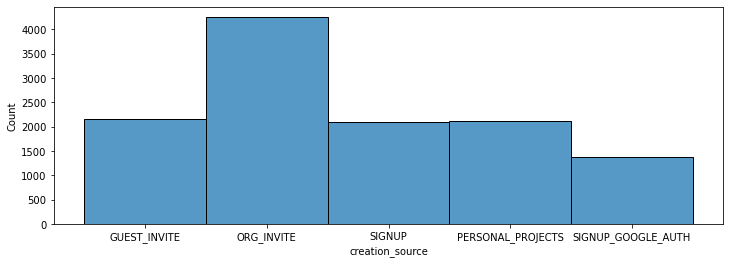

In [17]:
plt.figure(figsize=(12,4))
sns.histplot(data=users_df,x=users_df['creation_source'])
plt.show()

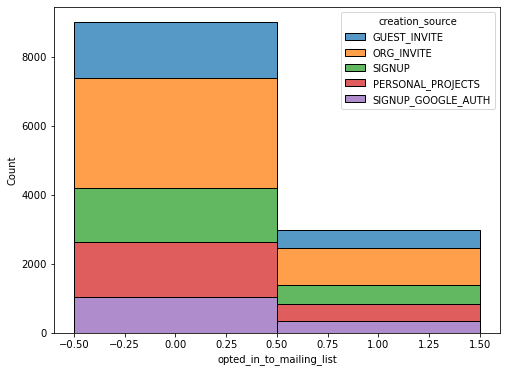

In [38]:
plt.figure(figsize=(8,6))
sns.histplot(data=users_df,x='opted_in_to_mailing_list',hue='creation_source',discrete=True,multiple='stack')
plt.show()

In [37]:
users_df[users_df['creation_source']=='GUEST_INVITE']['opted_in_to_mailing_list'].count()

2163

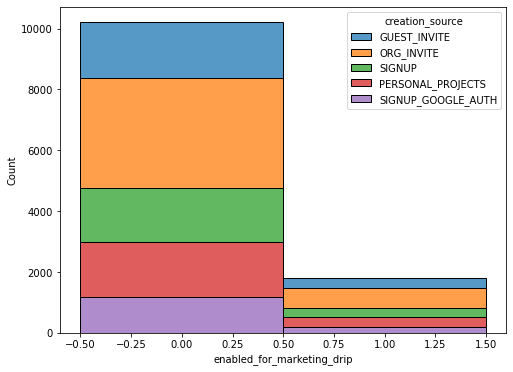

In [39]:
plt.figure(figsize=(8,6))
sns.histplot(data=users_df,x='enabled_for_marketing_drip',hue='creation_source',discrete=True,multiple='stack')
plt.show()

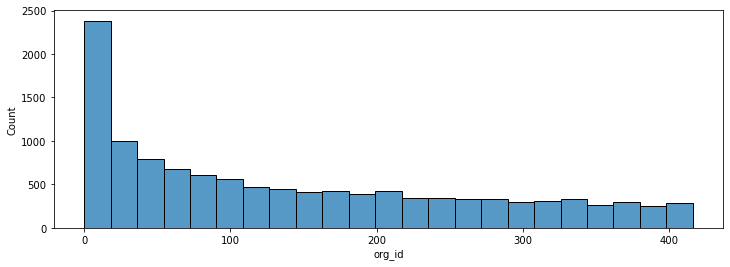

In [40]:
plt.figure(figsize=(12,4))
sns.histplot(data=users_df,x=users_df['org_id'])
plt.show()

In [49]:
users_df['last_session_creation_time'] = pd.to_datetime(users_df['last_session_creation_time'] ,unit='s')
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [48]:
login_df = pd.read_csv('takehome_user_engagement.csv')
login_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [58]:
login_df['date'] = pd.to_datetime(login_df.time_stamp,format='%Y-%m-%d')
login_df.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04


In [60]:
login_df['date'] = login_df['date'].dt.strftime('%Y-%m-%d')
login_df.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [61]:
def rolling_count(df_group, frequency):
    return df_group.rolling(frequency, on='date')['user_id'].count()

In [66]:
login_df['visits_7_days'] = login_df.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, 7)

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(
/Users/amalsoman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/window/rolling.py:1623: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Spec

In [67]:
login_df.head()

,time_stamp,user_id,visited,date,visits_7_days
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0
1,2013-11-15 03:45:04,2,1,2013-11-15,1.0
2,2013-11-29 03:45:04,2,1,2013-11-29,2.0
3,2013-12-09 03:45:04,2,1,2013-12-09,3.0
4,2013-12-25 03:45:04,2,1,2013-12-25,4.0


In [68]:
login_df[login_df.visits_7_days>=3]

,time_stamp,user_id,visited,date,visits_7_days
3,2013-12-09 03:45:04,2,1,2013-12-09,3.0
4,2013-12-25 03:45:04,2,1,2013-12-25,4.0
5,2013-12-31 03:45:04,2,1,2013-12-31,5.0
6,2014-01-08 03:45:04,2,1,2014-01-08,6.0
7,2014-02-03 03:45:04,2,1,2014-02-03,7.0
...,...,...,...,...,...
207901,2014-05-27 11:04:47,11988,1,2014-05-27,7.0
207902,2014-06-01 11:04:47,11988,1,2014-06-01,7.0
207907,2014-04-28 14:22:45,11991,1,2014-04-28,3.0
207908,2014-05-17 14:22:45,11991,1,2014-05-17,4.0


In [69]:
user_adopted = login_df.groupby('user_id')['visits_7_days'].max().reset_index()

In [71]:
user_adopted['adopted_user'] = user_adopted['visits_7_days'].apply(lambda x: 1 if x>=3 else 0)

In [72]:
user_adopted.head()

,user_id,visits_7_days,adopted_user
0,1,1.0,0
1,2,7.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0


In [78]:
user_adopted.drop('visits_7_days',axis=1,inplace=True)
user_adopted.rename(columns={'user_id':'object_id'},inplace=True)

In [79]:
user_adopted.head()

,object_id,adopted_user
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [80]:
user_adopted.set_index('object_id',inplace=True)
user_adopted.head()

,adopted_user
object_id,
1,0
2,1
3,0
4,0
5,0


In [81]:
df_users = users_df.join(user_adopted, on = 'object_id', how='left')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [82]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                8823 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)


In [84]:
df_users['last_session_creation_time'].fillna(0,inplace=True)
df_users['adopted_user'].fillna(0,inplace=True)
df_users['invited_by_user_id'].fillna(0,inplace=True)

In [85]:
df_users.drop(['object_id', 'name', 'email'], axis = 1, inplace = True)

In [99]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   creation_source             12000 non-null  object 
 2   last_session_creation_time  12000 non-null  object 
 3   opted_in_to_mailing_list    12000 non-null  int64  
 4   enabled_for_marketing_drip  12000 non-null  int64  
 5   org_id                      12000 non-null  int64  
 6   invited_by_user_id          12000 non-null  float64
 7   adopted_user                12000 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 750.1+ KB


In [101]:
df_users.drop(['creation_time','last_session_creation_time'],axis=1,inplace=True)
df_users

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,GUEST_INVITE,1,0,11,10803.0,0.0
1,ORG_INVITE,0,0,1,316.0,1.0
2,ORG_INVITE,0,0,94,1525.0,0.0
3,GUEST_INVITE,0,0,1,5151.0,0.0
4,GUEST_INVITE,0,0,193,5240.0,0.0
...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,8263.0,0.0
11996,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,0.0
11997,GUEST_INVITE,1,1,83,8074.0,0.0
11998,PERSONAL_PROJECTS,0,0,6,0.0,0.0


In [102]:
df_users.corr()['adopted_user']

opted_in_to_mailing_list      0.008452
enabled_for_marketing_drip    0.007370
org_id                        0.076388
invited_by_user_id            0.030091
adopted_user                  1.000000
Name: adopted_user, dtype: float64

<AxesSubplot:>

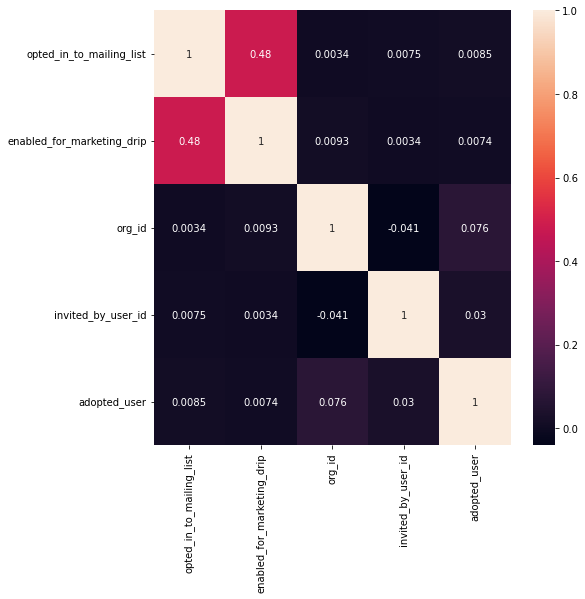

In [103]:
cor = df_users.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True)

In [104]:
X = df_users[['opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id']]
y = df_users[['adopted_user']]

In [117]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=340)
model.fit(X,y)
importances = model.feature_importances_
final_df = pd.DataFrame({'Features':X.columns,'Importances':importances})
final_df.set_index('Importances')
final_df.sort_values('Importances')

/var/folders/z2/69mr6tcj24j013knzvrrqvgm0000gn/T/ipykernel_59676/2388918058.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


,Features,Importances
1,enabled_for_marketing_drip,0.014381
0,opted_in_to_mailing_list,0.017210
3,invited_by_user_id,0.422228
2,org_id,0.546181


In [113]:
final_df.set_index('Importances')

,Features
Importances,
0.019534,opted_in_to_mailing_list
0.015061,enabled_for_marketing_drip
0.543666,org_id
0.421740,invited_by_user_id


<AxesSubplot:>

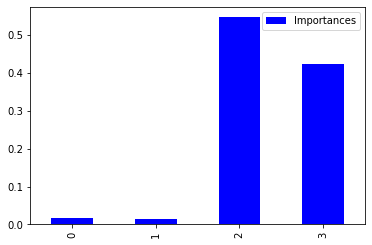

In [118]:
final_df.plot.bar(color='blue')